In [1]:
import inspect

In [2]:
import graphviz

In [4]:
import importlib

In [7]:
module_obj = importlib.import_module('graphviz')

In [12]:
for idx, func in enumerate(inspect.getmembers(module_obj, inspect.ismodule)):
    print(idx, '\t', func)
print('*'*25)
for idx, func in enumerate(inspect.getmembers(module_obj, inspect.isclass)):
    print(idx, '\t', func)
print('*'*25)
for idx, func in enumerate(inspect.getmembers(module_obj, inspect.isfunction)):
    print(idx, '\t', func)

0 	 ('_compat', <module 'graphviz._compat' from 'D:\\ProgramFile\\Anaconda3\\envs\\dev\\lib\\site-packages\\graphviz\\_compat.py'>)
1 	 ('backend', <module 'graphviz.backend' from 'D:\\ProgramFile\\Anaconda3\\envs\\dev\\lib\\site-packages\\graphviz\\backend.py'>)
2 	 ('dot', <module 'graphviz.dot' from 'D:\\ProgramFile\\Anaconda3\\envs\\dev\\lib\\site-packages\\graphviz\\dot.py'>)
3 	 ('files', <module 'graphviz.files' from 'D:\\ProgramFile\\Anaconda3\\envs\\dev\\lib\\site-packages\\graphviz\\files.py'>)
4 	 ('lang', <module 'graphviz.lang' from 'D:\\ProgramFile\\Anaconda3\\envs\\dev\\lib\\site-packages\\graphviz\\lang.py'>)
5 	 ('tools', <module 'graphviz.tools' from 'D:\\ProgramFile\\Anaconda3\\envs\\dev\\lib\\site-packages\\graphviz\\tools.py'>)
*************************
0 	 ('Digraph', <class 'graphviz.dot.Digraph'>)
1 	 ('ExecutableNotFound', <class 'graphviz.backend.ExecutableNotFound'>)
2 	 ('Graph', <class 'graphviz.dot.Graph'>)
3 	 ('RequiredArgumentError', <class 'graphviz.ba

In [35]:
def print_modules(module_obj, select_module=inspect.ismodule, cnt=0):
    for idx, [func_name, func_obj] in enumerate(inspect.getmembers(module_obj, select_module)):
        if func_name[0] == '_':
            continue
        str_func_obj = str(func_obj).replace('\\\\', '/')
        split_str_func_obj = str_func_obj.split('from ')
        str_func_name = split_str_func_obj[-1].find('D:/ProgramFile/Anaconda3/envs/dev/lib/site-packages/')
        # print(func_name, func_obj, str_func_obj, split_str_func_obj, str_func_name)
        if str_func_name == -1:
            continue
        # print('\t'*cnt, idx, '\t', func_name, func_obj)
        print('\t'*cnt, 'module:', idx, ' :', func_name, func_obj)
        # print_modules(func_obj, cnt=cnt+1)
        print_classes(func_name, func_obj, inspect.isclass, cnt=cnt+1)
        print_functions(func_name, func_obj, inspect.isclass, cnt=cnt+2)
def print_classes(module_name, module_obj, select_class=inspect.isclass, cnt=0):
    for idx, [func_name, func_obj] in enumerate(inspect.getmembers(module_obj, select_class)):
        if func_name[0] == '_':
            continue
        # print('\t'*cnt, idx, '\t', func_name, func_obj)
        print('\t'*cnt, 'class:', idx, ' :', func_name, func_obj)
        print_classes(module_name, func_obj, inspect.isfunction, cnt=cnt+1)
        print_functions(module_name, func_obj, inspect.isclass, cnt=cnt+2)
def print_functions(module_name, module_obj, select_function=inspect.isfunction, cnt=0):
    for idx, [func_name, func_obj] in enumerate(inspect.getmembers(module_obj, select_function)):
        if func_name[0] == '_':
            continue
        # print('\t'*cnt, idx, '\t', func_name, func_obj)
        print('\t'*cnt, 'function:', idx, ' :', module_name, func_name, func_obj)

print_modules(module_obj)
print_classes('', module_obj)
print_functions('', module_obj)

 module: 1  : backend <module 'graphviz.backend' from 'D:\\ProgramFile\\Anaconda3\\envs\\dev\\lib\\site-packages\\graphviz\\backend.py'>
	 class: 0  : CalledProcessError <class 'graphviz.backend.CalledProcessError'>
	 class: 1  : ExecutableNotFound <class 'graphviz.backend.ExecutableNotFound'>
	 class: 2  : RequiredArgumentError <class 'graphviz.backend.RequiredArgumentError'>
		 function: 0  : backend CalledProcessError <class 'graphviz.backend.CalledProcessError'>
		 function: 1  : backend ExecutableNotFound <class 'graphviz.backend.ExecutableNotFound'>
		 function: 2  : backend RequiredArgumentError <class 'graphviz.backend.RequiredArgumentError'>
 module: 2  : dot <module 'graphviz.dot' from 'D:\\ProgramFile\\Anaconda3\\envs\\dev\\lib\\site-packages\\graphviz\\dot.py'>
	 class: 0  : Digraph <class 'graphviz.dot.Digraph'>
		 class: 14  : attr <function Dot.attr at 0x000001DD61860B70>
		 class: 15  : clear <function Dot.clear at 0x000001DD61860840>
		 class: 16  : copy <function Base

In [39]:
from graphviz import Graph

svg_extension = 'svg'
dot = '.'
file_path = './../data/create/'
file_name = 'activate-graph-20200229-1'

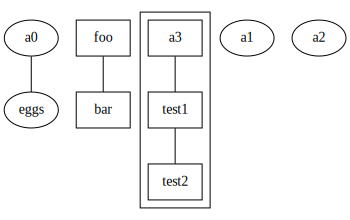

In [40]:
p = Graph(
    name='cluster_0',
    format=svg_extension,
    engine='dot'
)
p.edge('a0', 'eggs')

c = Graph(
    name='child',
    node_attr={'shape': 'box'}
)
c.edge('foo', 'bar')

d = Graph(
    name='cluster_1'
)
d.edge('test1', 'test2')
d.node('a3')
d.edge('a3', 'test1')
c.subgraph(d)

p.subgraph(c)
# subgraph_1 = g.subgraph('cluster_0', 'cluster_00', 'cluster_00', 'cluster_00', 'cluster_00')
# subgraph_1.node('a0')
# subgraph_1

p.node('a1')
p.node('a2')

output_file_path = file_path + file_name
p.render(output_file_path, view=False)

p

In [43]:
from graphviz import Digraph

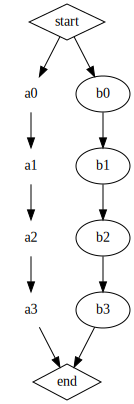

In [59]:
dg = Digraph(
    name='root',
    format=svg_extension,
    engine='dot'
)

dg.node('start', shape='diamond')
dg.node('end', shape='diamond')
dg_subgraph1 = Digraph(name='subgraph1')
# dg_subgraph1 = Digraph(name='subgraph1', style='filled', color='lightgrey')
dg_subgraph1.attr(style='filled', color='lightgrey')
dg_subgraph1.node_attr.update(style='filled', color='white')
dg_subgraph1.node('a0')
dg_subgraph1.node('a1')
dg_subgraph1.node('a2')
dg_subgraph1.node('a3')
dg_subgraph1.edge('a0', 'a1')
dg_subgraph1.edge('a1', 'a2')
dg_subgraph1.edge('a2', 'a3')

dg.subgraph(dg_subgraph1)


dg_subgraph2 = Digraph(name='subgraph2')
dg_subgraph2.node('b0')
dg_subgraph2.node('b1')
dg_subgraph2.node('b2')
dg_subgraph2.node('b3')
dg_subgraph2.edge('b0', 'b1')
dg_subgraph2.edge('b1', 'b2')
dg_subgraph2.edge('b2', 'b3')

dg.subgraph(dg_subgraph2)

# dg.node('b0')
# dg.node('b1')
# dg.node('b2')
# dg.node('b3')

dg.edge('start', 'a0')
dg.edge('start', 'b0')

dg.edge('a3', 'end')
dg.edge('b3', 'end')
dg

In [ ]:
dg = Digraph(
    name='root',
    format=svg_extension,
    engine='dot'
)

dg_root_subgraph1 = Digraph(name='subgraphRoot1')
dg.node('start', shape='diamond')
dg.node('end', shape='diamond')
dg_subgraph1 = Digraph(name='subgraph1')
dg_subgraph1.node('a0')
dg_subgraph1.node('a1')
dg_subgraph1.node('a2')
dg_subgraph1.node('a3')
dg_subgraph1.edge('a0', 'a1')
dg_subgraph1.edge('a1', 'a2')
dg_subgraph1.edge('a2', 'a3')

dg_root_subgraph1.subgraph(dg_subgraph1)
dg.subgraph(dg_root_subgraph1)


dg_subgraph2 = Digraph(name='subgraph2')
dg_subgraph2.node('b0')
dg_subgraph2.node('b1')
dg_subgraph2.node('b2')
dg_subgraph2.node('b3')
dg_subgraph2.edge('b0', 'b1')
dg_subgraph2.edge('b1', 'b2')
dg_subgraph2.edge('b2', 'b3')

dg.subgraph(dg_subgraph2)

# dg.node('b0')
# dg.node('b1')
# dg.node('b2')
# dg.node('b3')

dg.edge('start', 'a0')
dg.edge('start', 'b0')

dg.edge('a3', 'end')
dg.edge('b3', 'end')
dg

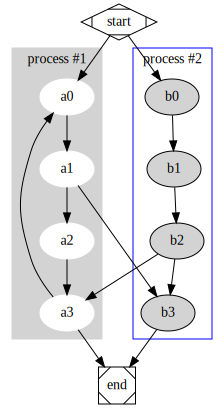

In [61]:
# from graphviz import Graph
from graphviz import Digraph
# cluster.py - http://www.graphviz.org/content/cluster

# from graphviz import Digraph

# g = Digraph('G', filename='cluster.gv')

svg_extension = 'svg'
dot = '.'
file_path = './../data/create/'
file_name = 'activate-graph-20200229-1'

g = Digraph(
    name='root',
    format=svg_extension,
    engine='dot'
)

# NOTE: the subgraph name needs to begin with 'cluster' (all lowercase)
#       so that Graphviz recognizes it as a special cluster subgraph

with g.subgraph(name='cluster_0') as c:
    c.attr(style='filled', color='lightgrey')
    c.node_attr.update(style='filled', color='white')
    c.edges([('a0', 'a1'), ('a1', 'a2'), ('a2', 'a3')])
    c.attr(label='process #1')

with g.subgraph(name='cluster_1') as c:
    c.attr(color='blue')
    c.node_attr['style'] = 'filled'
    c.edges([('b0', 'b1'), ('b1', 'b2'), ('b2', 'b3')])
    c.attr(label='process #2')

g.edge('start', 'a0')
g.edge('start', 'b0')
g.edge('a1', 'b3')
g.edge('b2', 'a3')
g.edge('a3', 'a0')
g.edge('a3', 'end')
g.edge('b3', 'end')

g.node('start', shape='Mdiamond')
g.node('end', shape='Msquare')

# g.view()
# g
output_file_path = file_path + file_name
g.render(output_file_path, view=False)

g

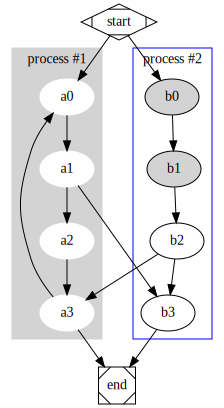

In [62]:
# from graphviz import Graph
from graphviz import Digraph
# cluster.py - http://www.graphviz.org/content/cluster

# from graphviz import Digraph

# g = Digraph('G', filename='cluster.gv')

svg_extension = 'svg'
dot = '.'
file_path = './../data/create/'
file_name = 'activate-graph-20200229-2'

g = Digraph(
    name='root',
    format=svg_extension,
    engine='dot'
)

# NOTE: the subgraph name needs to begin with 'cluster' (all lowercase)
#       so that Graphviz recognizes it as a special cluster subgraph

with g.subgraph(name='cluster_0') as c:
    c.attr(style='filled', color='lightgrey')
    c.node_attr.update(style='filled', color='white')
    c.edges([('a0', 'a1'), ('a1', 'a2'), ('a2', 'a3')])
    c.attr(label='process #1')

with g.subgraph(name='cluster_1') as c:
    c.attr(color='blue')
    c.node_attr['style'] = 'filled'
    c.edges([('b0', 'b1'), ('b1', 'b2'), ('b2', 'b3')])
    c.attr(label='process #2')
    g.edge('a1', 'b3')
    g.edge('b2', 'a3')
    g.edge('a3', 'a0')

g.edge('start', 'a0')
g.edge('start', 'b0')
# g.edge('a1', 'b3')
# g.edge('b2', 'a3')
# g.edge('a3', 'a0')
g.edge('a3', 'end')
g.edge('b3', 'end')

g.node('start', shape='Mdiamond')
g.node('end', shape='Msquare')

# g.view()
# g
output_file_path = file_path + file_name
g.render(output_file_path, view=False)

g

digraph cluster_0 {
}


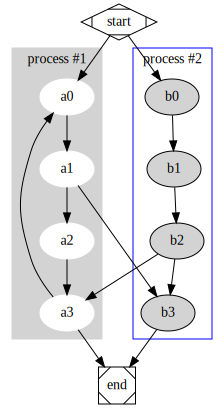

In [80]:
# from graphviz import Graph
from graphviz import Digraph
# cluster.py - http://www.graphviz.org/content/cluster

# from graphviz import Digraph

# g = Digraph('G', filename='cluster.gv')

svg_extension = 'svg'
dot = '.'
file_path = './../data/create/'
file_name = 'activate-graph-20200229-3'

g = Digraph(
    name='root',
    format=svg_extension,
    engine='dot'
)

# NOTE: the subgraph name needs to begin with 'cluster' (all lowercase)
#       so that Graphviz recognizes it as a special cluster subgraph

with g.subgraph(name='cluster_0') as c:
    c.attr(style='filled', color='lightgrey')
    c.node_attr.update(style='filled', color='white')
    # c.edges([('a0', 'a1'), ('a1', 'a2'), ('a2', 'a3')])
    c.attr(label='process #1')
    c.node('a0')
    c.node('a1')
    c.node('a2')
    c.node('a3')

# g.edges([('a0', 'a1'), ('a1', 'a2'), ('a2', 'a3')])
g.edge('a0', 'a1')
g.edge('a1', 'a2')
g.edge('a2', 'a3')

with g.subgraph(name='cluster_1') as c:
    c.attr(color='blue')
    c.node_attr['style'] = 'filled'
    # c.edges([('b0', 'b1'), ('b1', 'b2'), ('b2', 'b3')])
    c.attr(label='process #2')
    c.node('b0')
    c.node('b1')
    c.node('b2')
    c.node('b3')
# d = g.subgraph(name='cluster_1')
# print(d)
# d.attr(color='blue')
# d.node_attr['style'] = 'filled'
# # c.edges([('b0', 'b1'), ('b1', 'b2'), ('b2', 'b3')])
# d.attr(label='process #2')
# d.node('b0')
# d.node('b1')
# d.node('b2')
# d.node('b3')

# g.edges([('b0', 'b1'), ('b1', 'b2'), ('b2', 'b3')])
g.edge('b0', 'b1')
g.edge('b1', 'b2')
g.edge('b2', 'b3')

g.edge('start', 'a0')
g.edge('start', 'b0')
g.edge('a1', 'b3')
g.edge('b2', 'a3')
g.edge('a3', 'a0')
g.edge('a3', 'end')
g.edge('b3', 'end')

g.node('start', shape='Mdiamond')
g.node('end', shape='Msquare')

# g.view()
# g
output_file_path = file_path + file_name
g.render(output_file_path, view=False)

g

In [63]:
import importlib

In [65]:
module_obj = importlib.import_module('graphviz')

In [66]:
module_obj

<module 'graphviz' from 'D:\\ProgramFile\\Anaconda3\\envs\\dev\\lib\\site-packages\\graphviz\\__init__.py'>

In [68]:
getattr(module_obj, 'Digraph'), getattr(module_obj, 'Graph')

(graphviz.dot.Digraph, graphviz.dot.Graph)

In [102]:
# # cluster.py - http://www.graphviz.org/content/cluster

# from graphviz import Digraph

# g = Digraph('G', filename='cluster.gv', format='svg')

# # NOTE: the subgraph name needs to begin with 'cluster' (all lowercase)
# #       so that Graphviz recognizes it as a special cluster subgraph

# with g.subgraph(name='cluster_0') as c:
#     c.attr(style='filled', color='lightgrey', id='aaa')
#     c.node_attr.update(style='filled', color='white')
#     c.edges([('a0', 'a1'), ('a1', 'a2'), ('a2', 'a3')])
#     c.attr(label='process #1')

# with g.subgraph(name='cluster_1') as c:
#     c.attr(color='blue')
#     c.node_attr['style'] = 'filled'
#     c.edges([('b0', 'b1'), ('b1', 'b2'), ('b2', 'b3')])
#     c.attr(label='process #2')

# g.edge('start', 'a0')
# g.edge('start', 'b0')
# g.edge('a1', 'b3')
# g.edge('b2', 'a3')
# g.edge('a3', 'a0')
# g.edge('a3', 'end')
# g.edge('b3', 'end')

# g.node('start', shape='Mdiamond')
# g.node('end', shape='Msquare')

# g.view()

In [137]:
output_graph_dict = {
    'nodes': [
        {
            'attr': {
                'id': 'start',
                'shape': 'Mdiamond'
            }
        },
        {
            'attr': {
                'id': 'end',
                'shape': 'Mdiamond'
            }
        }
    ],
    'edges': [
        {
            'edge': ('start', 'a0'),
            'attr': {
                'id': '0',
                'shape': 'Mdiamond'
            }
        },
        {
            'edge': ('start', 'b0'),
            'attr': {
                'id': '0',
                'shape': 'Mdiamond'
            }
        },
        {
            'edge': ('a1', 'b3'),
            'attr': {
                'id': '0',
                'shape': 'Mdiamond'
            }
        },
        {
            'edge': ('b2', 'a3'),
            'attr': {
                'id': '0',
                'shape': 'Mdiamond'
            }
        },
        {
            'edge': ('a3', 'end'),
            'attr': {
                'id': '0',
                'shape': 'Mdiamond'
            }
        },
        {
            'edge': ('b3', 'end'),
            'attr': {
                'id': '0',
                'shape': 'Mdiamond'
            }
        }
    ],
    'subgraph': [
        {
            'name': 'cluster_0',
            'attr': {
                'style': 'filled',
                'color': 'lightgrey',
                'label': 'process #1'
            },
            'node_attr': {
                'style': 'filled',
                'color': 'white'
            },
            'nodes': [
                'a0',
                'a1',
                'a2',
                'a3'
            ]
        },
        {
            'name': 'cluster_1',
            'attr': {
                'color': 'blue',
                'label': 'process #2'
            },
            'node_attr': {
                'style': 'filled'
            },
            'nodes': [
                'b0',
                'b1',
                'b2',
                'b3'
            ]
        }
    ]
}

In [138]:
for key in output_graph_dict:
    t_json = output_graph_dict[key]
    # print(key, t_json)
    print(key)
    for idx in range(0, len(t_json)):
        print('\t', idx, t_json[idx])

nodes
	 0 {'attr': {'id': 'start', 'shape': 'Mdiamond'}}
	 1 {'attr': {'id': 'end', 'shape': 'Mdiamond'}}
edges
	 0 {'edge': ('start', 'a0'), 'attr': {'id': '0', 'shape': 'Mdiamond'}}
	 1 {'edge': ('start', 'b0'), 'attr': {'id': '0', 'shape': 'Mdiamond'}}
	 2 {'edge': ('a1', 'b3'), 'attr': {'id': '0', 'shape': 'Mdiamond'}}
	 3 {'edge': ('b2', 'a3'), 'attr': {'id': '0', 'shape': 'Mdiamond'}}
	 4 {'edge': ('a3', 'end'), 'attr': {'id': '0', 'shape': 'Mdiamond'}}
	 5 {'edge': ('b3', 'end'), 'attr': {'id': '0', 'shape': 'Mdiamond'}}
subgraph
	 0 {'name': 'cluster_0', 'attr': {'style': 'filled', 'color': 'lightgrey', 'label': 'process #1'}, 'node_attr': {'style': 'filled', 'color': 'white'}, 'nodes': ['a0', 'a1', 'a2', 'a3']}
	 1 {'name': 'cluster_1', 'attr': {'color': 'blue', 'label': 'process #2'}, 'node_attr': {'style': 'filled'}, 'nodes': ['b0', 'b1', 'b2', 'b3']}


In [185]:
svg_extension = 'svg'
dot = '.'
file_path = './../data/create/'
file_name = 'activate-graph-20200229-4'

graph = Digraph(
    name='root',
    format=svg_extension,
    engine='dot'
)

In [186]:
# def return_str(target_str):
#     return target_str if target_str is not None else ''

def return_str(dictionary, target_str):
    if dictionary.get(target_str) is None:
        return None
    else:
        return dictionary[target_str]

nodes = output_graph_dict['nodes']
for idx in range(0, len(nodes)):
    target_node = nodes[idx]
    # print(idx, target_node)
    attrs = target_node['attr']
    attr_id = return_str(attrs, 'id')
    attr_name = attr_id if attr_id is not None else ''
    attr_shape = return_str(attrs, 'shape')
    attr_label = return_str(attrs, 'label')
    attr_style = return_str(attrs, 'style')
    attr_color = return_str(attrs, 'color')
    graph.node(attr_name, id=attr_id, shape=attr_shape, label=attr_label, style=attr_style, color=attr_color)

In [187]:
edges = output_graph_dict['edges']
for idx in range(0, len(edges)):
    target_attr = edges[idx]
    # print(idx, target_attrs)
    # print(idx)
    # print(target_attr)
    edge = target_attr['edge']
    attrs = target_attr['attr']
    # print('\t', attr)
    # print('\t', edge)
    attr_id = return_str(attrs, 'id')
    attr_name = attr_id if attr_id is not None else ''
    attr_shape = return_str(attrs, 'shape')
    attr_label = return_str(attrs, 'label')
    attr_style = return_str(attrs, 'style')
    attr_color = return_str(attrs, 'color')
    graph.edge(edge[0], edge[1], id=attr_id, shape=attr_shape, label=attr_label, style=attr_style, color=attr_color)

In [188]:
subgraphs = output_graph_dict['subgraph']
for idx in range(0, len(subgraphs)):
    subgraph = subgraphs[idx]
    print(idx, subgraph)
    name = subgraph['name']
    attr = subgraph['attr']
    node_attr = subgraph['node_attr']
    nodes = subgraph['nodes']
    # print('\t', name)
    print('\t', attr)
    print('\t', node_attr)
    # print('\t', nodes)
    attr_id = return_str(attrs, 'id')
    attr_shape = return_str(attrs, 'shape')
    attr_label = return_str(attrs, 'label')
    attr_style = return_str(attrs, 'style')
    attr_color = return_str(attrs, 'color')
    
    node_attr_id = return_str(node_attr, 'id')
    node_attr_shape = return_str(node_attr, 'shape')
    node_attr_label = return_str(node_attr, 'label')
    node_attr_style = return_str(node_attr, 'style')
    node_attr_color = return_str(node_attr, 'color')
    with graph.subgraph(name=name) as sub:
        sub.attr(id=attr_id, shape=attr_shape, label=attr_label, style=attr_style, color=attr_color)
        sub.node_attr.update(id=node_attr_id, shape=node_attr_shape, label=node_attr_label, style=node_attr_style, color=node_attr_color)
        
        # sub.nodes(nodes)
        # sub.attr(attr)
        # sub.node_attr(node_attr)
        for node_idx in range(0, len(nodes)):
            sub.node(nodes[node_idx])

0 {'name': 'cluster_0', 'attr': {'style': 'filled', 'color': 'lightgrey', 'label': 'process #1'}, 'node_attr': {'style': 'filled', 'color': 'white'}, 'nodes': ['a0', 'a1', 'a2', 'a3']}
	 {'style': 'filled', 'color': 'lightgrey', 'label': 'process #1'}
	 {'style': 'filled', 'color': 'white'}
1 {'name': 'cluster_1', 'attr': {'color': 'blue', 'label': 'process #2'}, 'node_attr': {'style': 'filled'}, 'nodes': ['b0', 'b1', 'b2', 'b3']}
	 {'color': 'blue', 'label': 'process #2'}
	 {'style': 'filled'}


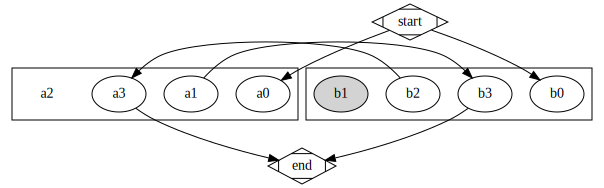

In [189]:
graph

In [190]:
print(graph.source)

digraph root {
	start [id=start shape=Mdiamond]
	end [id=end shape=Mdiamond]
	start -> a0 [id=0 shape=Mdiamond]
	start -> b0 [id=0 shape=Mdiamond]
	a1 -> b3 [id=0 shape=Mdiamond]
	b2 -> a3 [id=0 shape=Mdiamond]
	a3 -> end [id=0 shape=Mdiamond]
	b3 -> end [id=0 shape=Mdiamond]
	subgraph cluster_0 {
		node [color=white style=filled]
		id=0 shape=Mdiamond
		a0
		a1
		a2
		a3
	}
	subgraph cluster_1 {
		node [style=filled]
		id=0 shape=Mdiamond
		b0
		b1
		b2
		b3
	}
}


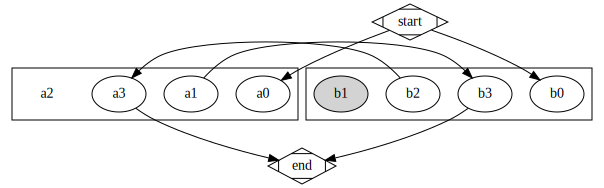

In [191]:

output_file_path = file_path + file_name
graph.render(output_file_path, view=False)

graph

In [ ]:
class GraphCreator(object):
    
    def __init__(self,
                 graph_format='svg',
                 graph_name='root',
                 engine='dot',
                 output_base_path='./',
                 file_name='graph',
                 graph_type='Graph',
                 subgraph_style='filled',
                 subgraph_color='lightgrey'
                ):
        import importlib
        import graphviz
        self.module = importlib.module_name('graphviz')
        self.graph_function = getattr(self.module, graph_type)
        self.graph_format = graph_extension
        self.graph_name = graph_name
        self.engine = engine
        self.output_base_path = output_base_path
        self.file_name = file_name
        self.subgraph_style = subgraph_style
        self.subgraph_color = subgraph_color
        self.idx = 0
        self.root_graph =  = self.graph_function(
            name='root',
            format=self.graph_format,
            engine=self.engin
        )
        
    def add_graph_node(self, add_graph_nodes):
        
with g.subgraph(name='cluster_0') as c:
    c.attr(style='filled', color='lightgrey')
    c.node_attr.update(style='filled', color='white')
    # c.edges([('a0', 'a1'), ('a1', 'a2'), ('a2', 'a3')])
    c.attr(label='process #1')
    c.node('a0')
    c.node('a1')
    c.node('a2')
    c.node('a3')
        

In [ ]:
# from graphviz import Graph
from graphviz import Digraph
# cluster.py - http://www.graphviz.org/content/cluster

# from graphviz import Digraph

# g = Digraph('G', filename='cluster.gv')

svg_extension = 'svg'
dot = '.'
file_path = './../data/create/'
file_name = 'activate-graph-20200229-2'

g = Digraph(
    name='root',
    format=svg_extension,
    engine='dot'
)

# NOTE: the subgraph name needs to begin with 'cluster' (all lowercase)
#       so that Graphviz recognizes it as a special cluster subgraph

with g.subgraph(name='cluster_0') as c:
    c.attr(style='filled', color='lightgrey')
    c.node_attr.update(style='filled', color='white')
    c.edges([('a0', 'a1'), ('a1', 'a2'), ('a2', 'a3')])
    c.attr(label='process #1')

with g.subgraph(name='cluster_1') as c:
    c.attr(color='blue')
    c.node_attr['style'] = 'filled'
    c.edges([('b0', 'b1'), ('b1', 'b2'), ('b2', 'b3')])
    c.attr(label='process #2')

g.edge('start', 'a0')
g.edge('start', 'b0')
g.edge('a1', 'b3')
g.edge('b2', 'a3')
g.edge('a3', 'a0')
g.edge('a3', 'end')
g.edge('b3', 'end')

g.node('start', shape='Mdiamond')
g.node('end', shape='Msquare')

# g.view()
# g
output_file_path = file_path + file_name
g.render(output_file_path, view=False)

g